### Objective

Main objective is to develop a model that will predict the chances of survival of a patient after 1 year of treatment in a hospital. The hospital authority has been trying to improve its care conditions by looking at historic survival of the patients. They tried looking at their data but could not identify the main factors leading to high survivals.


### Source of data: 
"https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv"

### Data Description:

    ID_Patient_Care_Situation: Care situation of a patient during treatment

    Diagnosed_Condition: The diagnosed condition of the patient

    ID_Patient: Patient identifier number

    Treated_with_drugs: Class of drugs used during treatment

    Patient_Age: Age of the patient

    Patient_Body_Mass_Index: A calculated value based on the patient’s weight, height, etc.

    Patient_Smoker: If the patient was a smoker or not

    Patient_Rural_Urban: If the patient stayed in Rural or Urban part of the country
    
    Patient_Mental_Condition: If the patient mentally stable or not.

    Previous_Condition: Condition of the patient before the start of the treatment ( This variable is splitted into 8 columns - A, B, C, D, E, F, Z and Number_of_prev_cond. A, B, C, D, E, F and Z are the previous conditions of the patient. Suppose for one patient, if the entry in column A is 1, it means that the previous condition of the patient was A. If the patient didn't have that condition, it is 0 and same for other conditions. If a patient has previous condition as A and C , columns A and C will have entries as 1 and 1 respectively while the other column B, D, E, F, Z will have entries 0, 0, 0, 0, 0 respectively. The column Number_of_prev_cond will have entry as 2 i.e. 1 + 0 + 1 + 0 + 0 + 0 + 0 + 0 = 2 in this case. )
    
    Survived_1_year: If the patient survived after one year (0 means did not survive; 1 means survived)

#### Let's begin the task

Importing Libraries: here all the necessary libraries will be imported. This is an iterative process, everytime we want to work with a new function which is not imported yet, we can comeback here and import that, instead of the middle of the work, it is a standard pracice to keep this import at the top of the model.

In [251]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
#import graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

Now download the dataset.

In [252]:
df = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')
df.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


Do some basic check of the data set in next few steps to get some idea about the data you are going to work on.

In [253]:
df.shape

(23097, 18)

In [254]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

It is clear from above that the dataset have some missing value, now as the first step, preparation of the data set, lets focus on the missing values, what is the nature of missing values, what are the locations, and how to deal with this.

In [255]:
df.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

Here it is found that, 9 columns have missing values, and 8 of them have equal number of missing values. Let us check one by one.

First, the first missing column, "Treated_with_drugs", to explore the column, lets check some basic information, like how many unique values it has, what is their frequency.

In [256]:
print(len(df["Treated_with_drugs"].unique()))

33


In [257]:
df["Treated_with_drugs"].value_counts()

DX6                     8606
DX5                     1909
DX2                     1904
DX1                     1835
DX3                     1830
DX4                     1792
DX1 DX2                  448
DX3 DX4                  448
DX1 DX3                  424
DX4 DX5                  423
DX2 DX4                  419
DX1 DX4                  408
DX3 DX5                  407
DX1 DX5                  402
DX2 DX5                  400
DX2 DX3                  398
DX1 DX2 DX5              103
DX1 DX3 DX5              101
DX1 DX2 DX4               99
DX3 DX4 DX5               96
DX1 DX2 DX3               95
DX2 DX3 DX5               91
DX1 DX3 DX4               90
DX2 DX3 DX4               87
DX2 DX4 DX5               84
DX1 DX4 DX5               80
DX1 DX3 DX4 DX5           24
DX1 DX2 DX3 DX4           24
DX2 DX3 DX4 DX5           22
DX1 DX2 DX4 DX5           18
DX1 DX2 DX3 DX5           14
DX1 DX2 DX3 DX4 DX5        3
Name: Treated_with_drugs, dtype: int64

We found this column has 33 unique value and we got their frequencies. But interestingly, at a first glance, it seems there is actually 33 unique combination of six values: {DX1, DX2, DX3, DX4, DX5, DX6}, different number of element of this set combined together to make 33 different values.

Here I want to test one thing, I will create another dataset splitting this column into six columns, and then will train and test my model to see, which one performs better, it might be easier for a algorithm to just take 2 value of 6 columns rather that 33 values of a single column.

But as I am not sure about the result I might get splitting this column into six, so i decided to create a separate dataframe, thus I can play with both of these.

In [258]:
df_a1 = df.copy(deep=True)
df_a1.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [259]:
df_a1['DX1'] = df_a1['Treated_with_drugs'].str.contains('DX1')
df_a1['DX2'] = df_a1['Treated_with_drugs'].str.contains('DX2')
df_a1['DX3'] = df_a1['Treated_with_drugs'].str.contains('DX3')
df_a1['DX4'] = df_a1['Treated_with_drugs'].str.contains('DX4')
df_a1['DX5'] = df_a1['Treated_with_drugs'].str.contains('DX5')
df_a1['DX6'] = df_a1['Treated_with_drugs'].str.contains('DX6')
df_a1 = df_a1.drop('Treated_with_drugs', axis = 1)
df_a1.head(10)

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,...,F,Z,Number_of_prev_cond,Survived_1_year,DX1,DX2,DX3,DX4,DX5,DX6
0,22374,8,3333,56,18.479385,YES,URBAN,Stable,1.0,0.0,...,0.0,0.0,2.0,0,False,False,False,False,False,True
1,18164,5,5740,36,22.945566,YES,RURAL,Stable,1.0,0.0,...,0.0,0.0,1.0,1,False,True,False,False,False,False
2,6283,23,10446,48,27.510027,YES,RURAL,Stable,1.0,0.0,...,0.0,0.0,1.0,0,False,False,False,False,False,True
3,5339,51,12011,5,19.130976,NO,URBAN,Stable,1.0,0.0,...,0.0,0.0,1.0,1,True,False,False,False,False,False
4,33012,0,12513,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,...,0.0,1.0,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN
5,10808,45,7977,47,26.155120,YES,URBAN,Stable,1.0,0.0,...,0.0,0.0,1.0,0,False,False,False,False,False,True
6,5138,52,5296,53,19.103244,NO,RURAL,Stable,1.0,0.0,...,0.0,0.0,2.0,1,False,False,True,False,False,False
7,17265,9,5947,3,18.126976,NO,URBAN,Stable,1.0,0.0,...,0.0,0.0,2.0,0,False,False,False,False,True,False
8,24349,47,6585,62,25.074482,NO,URBAN,Stable,1.0,0.0,...,0.0,0.0,1.0,1,False,False,False,True,False,False
9,1647,17,10190,46,17.663877,NO,RURAL,Stable,1.0,0.0,...,0.0,0.0,2.0,1,False,False,False,False,False,True


Now, rearranging the column name, shifting the new columns from the end to the position where original 'Treated_with_drugs' column was

In [260]:
print(df_a1.columns)

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Patient_Age', 'Patient_Body_Mass_Index', 'Patient_Smoker',
       'Patient_Rural_Urban', 'Patient_mental_condition', 'A', 'B', 'C', 'D',
       'E', 'F', 'Z', 'Number_of_prev_cond', 'Survived_1_year', 'DX1', 'DX2',
       'DX3', 'DX4', 'DX5', 'DX6'],
      dtype='object')


In [261]:
new_seq_col = ['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID', 'DX1', 'DX2', 'DX3', 'DX4', 'DX5', 'DX6', 'Patient_Age', 'Patient_Body_Mass_Index', 'Patient_Smoker',
       'Patient_Rural_Urban', 'Patient_mental_condition', 'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond', 'Survived_1_year']

In [262]:
df_a1 = df_a1[new_seq_col]
display(df_a1.head())

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,DX1,DX2,DX3,DX4,DX5,DX6,Patient_Age,...,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,False,False,False,False,False,True,56,...,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,False,True,False,False,False,False,36,...,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,False,False,False,False,False,True,48,...,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,True,False,False,False,False,False,5,...,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,NaN,NaN,NaN,NaN,NaN,128,...,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


Below we are checking to ensure that the original data is not changed anyway

In [263]:
display (df.head())

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


Now check, how many observations (rows) are affected by the missing value. Lets print all the rows with any missing value.

In [264]:
df_a1[df_a1.isna().any(axis=1)]

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,DX1,DX2,DX3,DX4,DX5,DX6,Patient_Age,...,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
4,33012,0,12513,NaN,NaN,NaN,NaN,NaN,NaN,128,...,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
27,4691,31,4500,False,True,False,False,False,False,44,...,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
36,4869,28,6826,True,False,False,False,False,False,4,...,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
41,32899,24,7275,False,True,False,False,True,False,12,...,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
97,9311,13,7538,False,True,False,False,False,False,49,...,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23002,6195,3,7812,False,True,False,False,False,False,26,...,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
23012,20220,48,12318,False,False,False,True,False,False,15,...,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
23024,25571,6,3423,False,True,False,False,False,False,13,...,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
23038,644,30,8032,False,False,True,False,True,False,45,...,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


So, we find here that, total 1248 observations have missing values. Just check the original data set to be sure that creting new columns doesn't create any new missing observation.

In [265]:
df[df.isnull().any(axis=1)]

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
27,4691,31,4500,DX2,44,27.935658,YES,URBAN,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
36,4869,28,6826,DX1,4,17.342624,NO,URBAN,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
41,32899,24,7275,DX2 DX5,12,20.994843,NO,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
97,9311,13,7538,DX2,49,26.641499,NO,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23002,6195,3,7812,DX2,26,26.548517,YES,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
23012,20220,48,12318,DX4,15,18.849124,NO,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
23024,25571,6,3423,DX2,13,24.343030,NO,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
23038,644,30,8032,DX3 DX5,45,19.272509,NO,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


It is showing the same result, so no new problem created due to split.

Previously, we saw that, 9 columns have missing value, but we can divided them into 2 groups, one is the "Treated_with_drugs" column, and other 8 all are related to "Previous condition".

Total 5% rows have missing value, now we need to decide how to treat these. Considering small amount the and importance of the column, it is better to drop those observation. Here we create another dataset keeping original untouched.

In [266]:
df_a2 = df_a1.dropna(axis = 0, how ='any')
display(df_a2.head())

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,DX1,DX2,DX3,DX4,DX5,DX6,Patient_Age,...,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,False,False,False,False,False,True,56,...,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,False,True,False,False,False,False,36,...,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,False,False,False,False,False,True,48,...,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,True,False,False,False,False,False,5,...,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
5,10808,45,7977,False,False,False,False,False,True,47,...,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


Now check are we able to drop all null rows.

In [267]:
df_a2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21849 entries, 0 to 23096
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  21849 non-null  int64  
 1   Diagnosed_Condition        21849 non-null  int64  
 2   Patient_ID                 21849 non-null  int64  
 3   DX1                        21849 non-null  object 
 4   DX2                        21849 non-null  object 
 5   DX3                        21849 non-null  object 
 6   DX4                        21849 non-null  object 
 7   DX5                        21849 non-null  object 
 8   DX6                        21849 non-null  object 
 9   Patient_Age                21849 non-null  int64  
 10  Patient_Body_Mass_Index    21849 non-null  float64
 11  Patient_Smoker             21849 non-null  object 
 12  Patient_Rural_Urban        21849 non-null  object 
 13  Patient_mental_condition   21849 non-null  obj

Now, check the correlation of features respective to "Survived 1 year" column (target feature), and drop insignificant features. Heatmap is a good way to do so, but as the number of feature is too high, we might not do it in single step, rather do step by step dropping few columns at a time.

<AxesSubplot:>

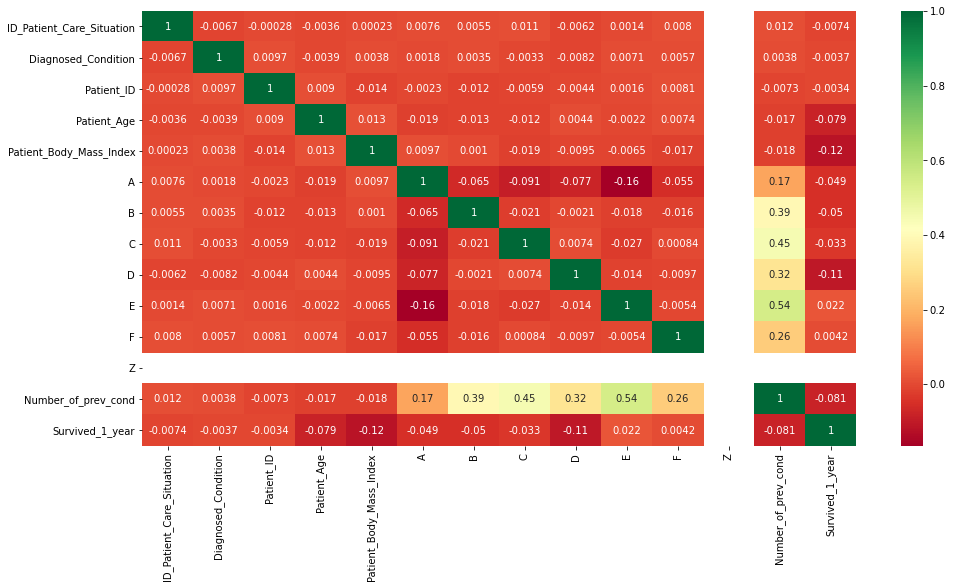

In [268]:
corr = df_a2.corr()
plt.figure(figsize=(16,8))
sns.heatmap(corr, annot=True, cmap="RdYlGn")

From above heatmap,first 3 features seem insignificant, drop those initially and re-assess.

<AxesSubplot:>

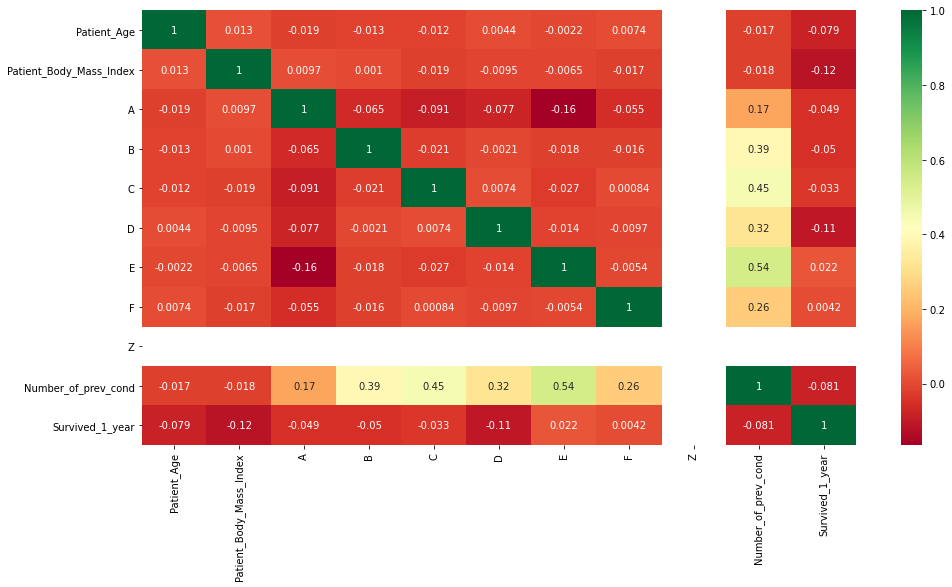

In [269]:
df_a3 = df_a2.drop(["ID_Patient_Care_Situation", "Diagnosed_Condition", "Patient_ID"], axis=1)
corr = df_a3.corr()
plt.figure(figsize=(16,8))
sns.heatmap(corr, annot=True, cmap="RdYlGn")

The feature Z is confusing, lets check it in details

In [270]:
df_a3["Z"].describe

<bound method NDFrame.describe of 0        0.0
1        0.0
2        0.0
3        0.0
5        0.0
        ... 
23092    0.0
23093    0.0
23094    0.0
23095    0.0
23096    0.0
Name: Z, Length: 21849, dtype: float64>

In [271]:
df["Z"].describe()

count    21862.000000
mean         0.000595
std          0.024379
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Z, dtype: float64

In [272]:
print(len(df_a3["Z"].unique()))
print(len(df["Z"].unique()))

1
3


In [273]:
df["Z"].value_counts()

0.0    21849
1.0       13
Name: Z, dtype: int64

In [274]:
df[df.Z==1]

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
4,33012,0,12513,NaN,128,1.3484,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
218,33008,0,12509,NaN,112,1.2925,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
2540,33014,0,12515,NaN,149,1.7784,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
2711,33004,0,12505,NaN,123,1.9290,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
4308,33001,0,12502,NaN,114,1.6239,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
4887,33011,0,12512,NaN,132,1.9896,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
6308,33010,0,12511,NaN,142,1.5701,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
10388,33006,0,12507,NaN,138,1.3745,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
10663,33009,0,12510,NaN,142,1.1450,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
12782,33000,0,12501,NaN,112,1.5465,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


It seems, when we drop the nan value from "Treated with drugs" column, we also exclude all "1" value from the original data set, we might think about re-include the dropped observation, but it might result a overfitting, so rather drop column Z.

In [275]:
df_a3 = df_a3.drop(["Z"], axis=1)
df_a3.head()

,DX1,DX2,DX3,DX4,DX5,DX6,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Number_of_prev_cond,Survived_1_year
0,False,False,False,False,False,True,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0
1,False,True,False,False,False,False,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,False,False,False,False,False,True,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,True,False,False,False,False,False,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
5,False,False,False,False,False,True,47,26.155120,YES,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0


Now, focus on object type variable and rearrange those column for better prediction., Lets see first how many object type column do we have.

In [276]:
df_a3.describe(include = "object")

,DX1,DX2,DX3,DX4,DX5,DX6,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition
count,21849,21849,21849,21849,21849,21849,21849,21849,21849
unique,2,2,2,2,2,2,2,2,1
top,False,False,False,False,False,False,NO,RURAL,Stable
freq,17907,17877,17919,17958,17906,13701,12519,15279,21849


It is not that much messy, we have 9 column of object type, out of whih, "Patient_mental_condition" consists single value, so we can drop it, and rest we can replace with "0" and "1"

In [277]:
df_a3 = df_a3.drop (["Patient_mental_condition"], axis = 1)

In [278]:
df_a3['Patient_Smoker'] = df_a3['Patient_Smoker'].apply(lambda x: 1 if x == 'YES' else 0)
df_a3['Patient_Rural_Urban'] = df_a3['Patient_Rural_Urban'].apply(lambda x: 1 if x == 'URBAN' else 0)


In [279]:
col_nam = ["DX1", "DX2", "DX3", "DX4", "DX5", "DX6"]
for col in col_nam:
    df_a3[col] = df_a3[col].astype(int)
#df_a3["DX1"] = df_a3["DX1"].astype(int)


In [280]:
df_a3.describe(include="all")

,DX1,DX2,DX3,DX4,DX5,DX6,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,E,F,Number_of_prev_cond,Survived_1_year
count,21849.000000,21849.000000,21849.000000,21849.000000,21849.000000,21849.000000,21849.000000,21849.000000,21849.000000,21849.000000,21849.000000,21849.000000,21849.000000,21849.000000,21849.000000,21849.000000,21849.000000,21849.000000
mean,0.180420,0.181793,0.179871,0.178086,0.180466,0.372923,33.232230,23.453391,0.427022,0.300700,0.898439,0.136436,0.185180,0.083665,0.393473,0.053732,1.750927,0.624376
std,0.384546,0.385683,0.384089,0.382594,0.384584,0.483593,19.406999,3.774410,0.494657,0.458573,0.302077,0.343259,0.388452,0.276891,0.488531,0.225494,0.770323,0.484295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000336,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,20.205050,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,23.368735,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,50.000000,26.775992,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,66.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


Now, we will try to build our model, and try to optimize it. This is a classification problem, we will try different technique as we dont know which would be a good fit.

We will compare the accuracy_score and f1_score to evaluate this model, as we are not sure what is the use of the model, what kind of decision may might take based on that, so not sure do we need to focus on any other matrix (like sensitivity, specificity, reducing false positive/negative), these two matrix should be enough to get an idea about the model performance.

In [281]:
X = df_a3.drop(["Survived_1_year"], axis=1)
y= df_a3.Survived_1_year
X.head()

,DX1,DX2,DX3,DX4,DX5,DX6,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,E,F,Number_of_prev_cond
0,0,0,0,0,0,1,56,18.479385,1,1,1.0,0.0,0.0,0.0,1.0,0.0,2.0
1,0,1,0,0,0,0,36,22.945566,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,0,0,0,0,1,48,27.510027,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0,0,0,0,0,5,19.130976,0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0,0,0,0,0,1,47,26.155120,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [282]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [283]:
model_1 = DecisionTreeClassifier()
model_1.fit(X_train, y_train)

DecisionTreeClassifier()

In [284]:
print('Training accuracy...', accuracy_score(y_train, model_1.predict(X_train)))
print('Test accuracy', accuracy_score(y_test, model_1.predict(X_test)))
print("F1 Score: ",f1_score(y_test, model_1.predict(X_test)))

Training accuracy... 0.9669840107408764
Test accuracy 0.7246933919092073
F1 Score:  0.7764565992865635


Extremely overfitted model, not good. Now focus on reducing the overfitting. Lets check it graphically how complex the model is.

In [285]:
model_1_a1 = DecisionTreeClassifier(max_depth = 3)
model_1_a1.fit(X_train, y_train)
print('Training accuracy...', accuracy_score(y_train, model_1_a1.predict(X_train)))
print('Test accuracy', accuracy_score(y_test, model_1_a1.predict(X_test)))
print("F1 Score: ",f1_score(y_test, model_1_a1.predict(X_test)))

Training accuracy... 0.7511900402782864
Test accuracy 0.748306791140399
F1 Score:  0.8153122901276024


In [286]:
model_1_a2 = DecisionTreeClassifier(max_depth = 5)
model_1_a2.fit(X_train, y_train)
print('Training accuracy...', accuracy_score(y_train, model_1_a2.predict(X_train)))
print('Test accuracy', accuracy_score(y_test, model_1_a2.predict(X_test)))
print("F1 Score: ",f1_score(y_test, model_1_a2.predict(X_test)))

Training accuracy... 0.7795679238374222
Test accuracy 0.7700896943071572
F1 Score:  0.8185495521525572


In [287]:
model_1_a3 = DecisionTreeClassifier(max_depth = 8)
model_1_a3.fit(X_train, y_train)
print('Training accuracy...', accuracy_score(y_train, model_1_a3.predict(X_train)))
print('Test accuracy', accuracy_score(y_test, model_1_a3.predict(X_test)))
print("F1 Score: ",f1_score(y_test, model_1_a3.predict(X_test)))

Training accuracy... 0.8080678628097157
Test accuracy 0.7865641588870584
F1 Score:  0.8310634598667053


Changing the max_depth, we can optimize the model. lets keep the model_1_a3 in consideration for now as this is giving us a good result with no significant overfitting.

In [288]:
params_1 = {'max_depth':[i for i in range(3, 9)], 
              'criterion':['gini', 'entropy'],
              'max_features':['auto', 'sqrt', 'log2', None]}
model_1_o = GridSearchCV(model_1, param_grid = params_1, cv=10, verbose=2, scoring='f1')
model_1_o.fit(X_train, y_train)
print('Training accuracy...', accuracy_score(y_train, model_1_o.predict(X_train)))
print('Test accuracy', accuracy_score(y_test, model_1_o.predict(X_test)))
print("F1 Score: ",f1_score(y_test, model_1_o.predict(X_test)))

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV] END .....criterion=gini, max_depth=3, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max

In [289]:
model_1_o.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'max_features': None}

Now try another model, Logistic regression.

In [290]:
model_2 = LogisticRegression(max_iter=10000)
model_2.fit(X_train,y_train)
print('Training accuracy...', accuracy_score(y_train, model_2.predict(X_train)))
print('Test accuracy', accuracy_score(y_test, model_2.predict(X_test)))
print("F1 Score: ",f1_score(y_test, model_2.predict(X_test)))

Training accuracy... 0.7309898694007079
Test accuracy 0.7318323265604979
F1 Score:  0.8002726653033402


In [291]:
model_3 = MLPClassifier(max_iter=1000)
model_3.fit(X_train,y_train)
print('Training accuracy...', accuracy_score(y_train, model_3.predict(X_train)))
print('Test accuracy', accuracy_score(y_test, model_3.predict(X_test)))
print("F1 Score: ",f1_score(y_test, model_3.predict(X_test)))

Training accuracy... 0.7898205785426584
Test accuracy 0.7883946549514919
F1 Score:  0.8401106500691563


In [292]:
knn_pipe = Pipeline([('mms', MinMaxScaler()),
                     ('knn', KNeighborsClassifier())])
params_2 = [{'knn__n_neighbors': [3, 5, 7, 9],
         'knn__weights': ['uniform', 'distance'],
         'knn__leaf_size': [15, 20]}]

In [293]:
model_4 = GridSearchCV(knn_pipe,
                      param_grid=params_2,
                      scoring='f1',
                      cv=5)

In [294]:
model_4.fit(X_train, y_train)
model_4.best_params_

{'knn__leaf_size': 15, 'knn__n_neighbors': 9, 'knn__weights': 'uniform'}

In [295]:
model_4.score(X_train, y_train)

0.84822840137636

In [296]:
print("F1 Score: ",f1_score(y_test, model_4.predict(X_test)))

F1 Score:  0.8173673328738801


In [297]:
model_5 = RandomForestClassifier()

In [298]:
criterion = ['gini', 'entropy']        # what criteria to consider

n_estimators = [100, 200, 300]       # Number of trees in random forest

max_features = ['auto', 'sqrt']       # Number of features to consider at every split

max_depth = [10, 20]      # Maximum number of levels in tree. Hope you remember linspace function from numpy session

max_depth.append(None)     # appending 'None' in max_depth i.e. no maximum depth to be considered.

params_3 = {'criterion': criterion,
          'n_estimators': n_estimators,
          'max_features': max_features,
          'max_depth': max_depth}

In [299]:
model_5_o = GridSearchCV(model_5, param_grid=params_3, n_jobs=2, scoring='f1')

In [300]:
model_5_o.fit(X_train,y_train)
print('Training accuracy...', accuracy_score(y_train, model_5_o.predict(X_train)))
print('Test accuracy', accuracy_score(y_test, model_5_o.predict(X_test)))
print("F1 Score: ",f1_score(y_test, model_5_o.predict(X_test)))

Training accuracy... 0.8283290613938729
Test accuracy 0.791140399048142
F1 Score:  0.8374875373878364


In [301]:
model_5_o.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 200}

After playing with several model, interestingly the best result we get using "model_3", without any optimization, faster and better. So, I am chossing this one for the prediction.

Now, to predict the outcome from test data, we will follow the below steps as we learn from training the training data set.

1. Download (read) the file.
2. Compare the feature with training data set.
3. Deal (check and delete/replace) null values.
4. Deal the "Treated_with_drug" features (check the unique data, split it into multiple column and finally delete it).
5. Drop (4) less important features.
6. Rearrange the column.
7. Convert "object" to "int".
8. Apply model_3.
9. Save your answers in a csv file.

Lets begin.

In [337]:
test_df = pd.read_csv(r"D:\Data Science\Dphi Bootcamp\Test_Data.csv")
test_df.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


1st step done, congrats. Lets start 2nd step, comparing feature.

In [338]:
test_df.shape

(9303, 17)

Number of column is one less than training data set, understandble because the last column (target feature) is not present. but do a through check, compare all the feature name.

In [339]:
print(df.columns)
print(test_df.columns)

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Treated_with_drugs', 'Patient_Age', 'Patient_Body_Mass_Index',
       'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition',
       'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond',
       'Survived_1_year'],
      dtype='object')
Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Treated_with_drugs', 'Patient_Age', 'Patient_Body_Mass_Index',
       'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition',
       'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond'],
      dtype='object')


Yes, no extra pain, features are same.

Now the next step, check null value.

In [340]:
test_df.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
dtype: int64

wow, we are in a dreamland, no missing value, great. Here ends step 3, now focus on step 4, very important.

Lets check this feature into details.

In [341]:
test_df["Treated_with_drugs"].value_counts()

DX6                     3462
DX4                      785
DX5                      782
DX1                      753
DX3                      747
DX2                      745
DX2 DX4                  181
DX2 DX3                  179
DX1 DX5                  166
DX2 DX5                  165
DX3 DX5                  161
DX1 DX2                  160
DX4 DX5                  157
DX1 DX4                  153
DX1 DX3                  152
DX3 DX4                  148
DX1 DX2 DX5               41
DX1 DX3 DX4               41
DX1 DX2 DX3               40
DX3 DX4 DX5               40
DX2 DX3 DX4               40
DX1 DX2 DX4               38
DX2 DX3 DX5               37
DX1 DX4 DX5               34
DX2 DX4 DX5               33
DX1 DX3 DX5               23
DX1 DX3 DX4 DX5           11
DX2 DX3 DX4 DX5            8
DX1 DX2 DX4 DX5            8
DX1 DX2 DX3 DX5            6
DX1 DX2 DX3 DX4            5
DX1 DX2 DX3 DX4 DX5        2
Name: Treated_with_drugs, dtype: int64

Yes, still a combination of DX1,2,3,4,5,6. So we can follow our training step as it was.

In [342]:
test_df['DX1'] = test_df['Treated_with_drugs'].str.contains('DX1')
test_df['DX2'] = test_df['Treated_with_drugs'].str.contains('DX2')
test_df['DX3'] = test_df['Treated_with_drugs'].str.contains('DX3')
test_df['DX4'] = test_df['Treated_with_drugs'].str.contains('DX4')
test_df['DX5'] = test_df['Treated_with_drugs'].str.contains('DX5')
test_df['DX6'] = test_df['Treated_with_drugs'].str.contains('DX6')
test_df = test_df.drop('Treated_with_drugs', axis = 1)
test_df.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,...,E,F,Z,Number_of_prev_cond,DX1,DX2,DX3,DX4,DX5,DX6
0,19150,40,3709,16,29.443894,NO,RURAL,Stable,1.0,0.0,...,1.0,0.0,0.0,2.0,False,False,True,False,False,False
1,23216,52,986,24,26.836321,NO,URBAN,Stable,1.0,1.0,...,0.0,0.0,0.0,2.0,False,False,False,False,False,True
2,11890,50,11821,63,25.523280,NO,RURAL,Stable,1.0,0.0,...,1.0,0.0,0.0,2.0,False,False,False,True,True,False
3,7149,32,3292,42,27.171155,NO,URBAN,Stable,1.0,0.0,...,1.0,0.0,0.0,3.0,False,False,False,False,False,True
4,22845,20,9959,50,25.556192,NO,RURAL,Stable,1.0,0.0,...,0.0,0.0,0.0,1.0,False,False,True,False,False,False


Great, step 4 done, now time to do step 5, simple as it is.

In [343]:
test_df = test_df.drop(["ID_Patient_Care_Situation", "Diagnosed_Condition", "Patient_ID", "Z", 'Patient_mental_condition'], axis=1)
display(test_df.head())

,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,E,F,Number_of_prev_cond,DX1,DX2,DX3,DX4,DX5,DX6
0,16,29.443894,NO,RURAL,1.0,0.0,0.0,0.0,1.0,0.0,2.0,False,False,True,False,False,False
1,24,26.836321,NO,URBAN,1.0,1.0,0.0,0.0,0.0,0.0,2.0,False,False,False,False,False,True
2,63,25.523280,NO,RURAL,1.0,0.0,0.0,0.0,1.0,0.0,2.0,False,False,False,True,True,False
3,42,27.171155,NO,URBAN,1.0,0.0,1.0,0.0,1.0,0.0,3.0,False,False,False,False,False,True
4,50,25.556192,NO,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,1.0,False,False,True,False,False,False


Now, step 6, rearrange the column.

In [344]:
new_seq_col_test = ['DX1', 'DX2', 'DX3', 'DX4', 'DX5', 'DX6', 'Patient_Age', 'Patient_Body_Mass_Index', 'Patient_Smoker',
       'Patient_Rural_Urban', 'A', 'B', 'C', 'D', 'E', 'F', 'Number_of_prev_cond']
test_df = test_df[new_seq_col_test]
display(test_df.head())

,DX1,DX2,DX3,DX4,DX5,DX6,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,E,F,Number_of_prev_cond
0,False,False,True,False,False,False,16,29.443894,NO,RURAL,1.0,0.0,0.0,0.0,1.0,0.0,2.0
1,False,False,False,False,False,True,24,26.836321,NO,URBAN,1.0,1.0,0.0,0.0,0.0,0.0,2.0
2,False,False,False,True,True,False,63,25.523280,NO,RURAL,1.0,0.0,0.0,0.0,1.0,0.0,2.0
3,False,False,False,False,False,True,42,27.171155,NO,URBAN,1.0,0.0,1.0,0.0,1.0,0.0,3.0
4,False,False,True,False,False,False,50,25.556192,NO,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,1.0


Done, now step 7, changing data type from "object" to "int".

In [345]:
test_df["Patient_Smoker"].value_counts()

NO     5333
YES    3970
Name: Patient_Smoker, dtype: int64

In [346]:
test_df["Patient_Rural_Urban"].value_counts()

RURAL    6502
URBAN    2801
Name: Patient_Rural_Urban, dtype: int64

In [347]:
test_df['Patient_Smoker'] = test_df['Patient_Smoker'].apply(lambda x: 0 if x == "NO" else 1)
test_df['Patient_Rural_Urban'] = test_df['Patient_Rural_Urban'].apply(lambda x: 0 if x == "RURAL" else 1)
for col in col_nam:
    test_df[col] = test_df[col].astype(int)
test_df.describe()

,DX1,DX2,DX3,DX4,DX5,DX6,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,E,F,Number_of_prev_cond
count,9303.000000,9303.000000,9303.000000,9303.000000,9303.000000,9303.000000,9303.000000,9303.000000,9303.000000,9303.000000,9303.000000,9303.000000,9303.000000,9303.000000,9303.000000,9303.000000,9303.000000
mean,0.175535,0.181447,0.176287,0.181017,0.179942,0.372138,33.249059,23.429321,0.426744,0.301086,0.893260,0.142320,0.183167,0.087284,0.399441,0.052886,1.758358
std,0.380444,0.385409,0.381085,0.385053,0.384160,0.483401,19.477920,3.769305,0.494631,0.458755,0.308799,0.349396,0.386824,0.282265,0.489810,0.223818,0.771230
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000695,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,20.166849,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,23.392495,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,50.000000,26.726929,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,66.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


Now, Apply the model_3 already trained.

In [353]:
prediction = pd.DataFrame(model_3.predict(test_df), columns=['prediction'])

In [354]:
print(prediction)

      prediction
0              1
1              0
2              1
3              1
4              1
...          ...
9298           0
9299           1
9300           1
9301           0
9302           0

[9303 rows x 1 columns]


In [356]:
prediction.to_csv(r'D:\Data Science\Dphi Bootcamp\prediction.csv', index=False)

And thats the end of the work. Thank you so much for your time.